## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from  keras.layers import Dense,Embedding,Flatten,Conv1D,Dropout,MaxPooling1D
from keras.models import Sequential
import re
from keras.preprocessing.text import Tokenizer
from keras import regularizers
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import os
from collections import defaultdict
from keras.preprocessing import sequence
from keras import optimizers
from keras_preprocessing import sequence
from sklearn.preprocessing import LabelBinarizer
from keras.layers import SimpleRNN,LSTM
from collections import  defaultdict
import keras
from keras import backend as K
import h5py

/home/sai/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv("/home/sai/Desktop/1Desktop_stuff/Project/Datasets/mtsamples.csv")

df.columns


Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords'],
      dtype='object')

In [3]:
df

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
5,5,Morbid obesity. Laparoscopic antecolic anteg...,Bariatrics,Laparoscopic Gastric Bypass,"PREOPERATIVE DIAGNOSIS: , Morbid obesity.,POST...","bariatrics, gastric bypass, eea anastomosis, r..."
6,6,"Liposuction of the supraumbilical abdomen, re...",Bariatrics,Liposuction,"PREOPERATIVE DIAGNOSES:,1. Deformity, right b...","bariatrics, breast reconstruction, excess, lma..."
7,7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","cardiovascular / pulmonary, 2-d echocardiogram..."
8,8,Suction-assisted lipectomy - lipodystrophy of...,Bariatrics,Lipectomy - Abdomen/Thighs,"PREOPERATIVE DIAGNOSIS: , Lipodystrophy of the...","bariatrics, lipodystrophy, abd pads, suction-a..."
9,9,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","cardiovascular / pulmonary, ejection fraction,..."


## Filtering out the less common samples

In [4]:
x= df.groupby('medical_specialty').count().description 

In [5]:
filtered_df=df.groupby('medical_specialty').filter(lambda x:len(x.description) > 50)

In [6]:
filtered_df = filtered_df[filtered_df.medical_specialty != ' Surgery']

In [7]:
filtered_df

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
7,7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","cardiovascular / pulmonary, 2-d echocardiogram..."
9,9,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","cardiovascular / pulmonary, ejection fraction,..."
11,11,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,2-D Doppler,"2-D STUDY,1. Mild aortic stenosis, widely calc...","cardiovascular / pulmonary, 2-d study, doppler..."
12,12,Cerebral Angiogram - moyamoya disease.,Neurology,Moyamoya Disease,"CC:, Confusion and slurred speech.,HX , (prima...",NaN
16,16,Neck exploration; tracheostomy; urgent flexib...,Cardiovascular / Pulmonary,Tracheostomy,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...","cardiovascular / pulmonary, airway, laryngolog..."
18,18,Fertile male with completed family. Elective...,Urology,Vasectomy - 4,"PROCEDURE: , Elective male sterilization via b...","urology, sterilization, vas, fertile male, bil..."
19,19,"The patient is a 17-year-old female, who pres...",General Medicine,Airway Compromise & Foreign Body - ER Visit,"HISTORY OF PRESENT ILLNESS:, The patient is a...","general medicine, diabetes, hypertension, asth..."
20,20,Whole body radionuclide bone scan due to pros...,Urology,Whole Body Radionuclide Bone Scan,"INDICATION:, Prostate Cancer.,TECHNIQUE:, 3....","urology, prostate cancer, technetium, whole bo..."


In [8]:
x= filtered_df.groupby('medical_specialty').count().description 

In [9]:
unique_elements,counts_elements = np.unique(ar=x,return_counts=True)

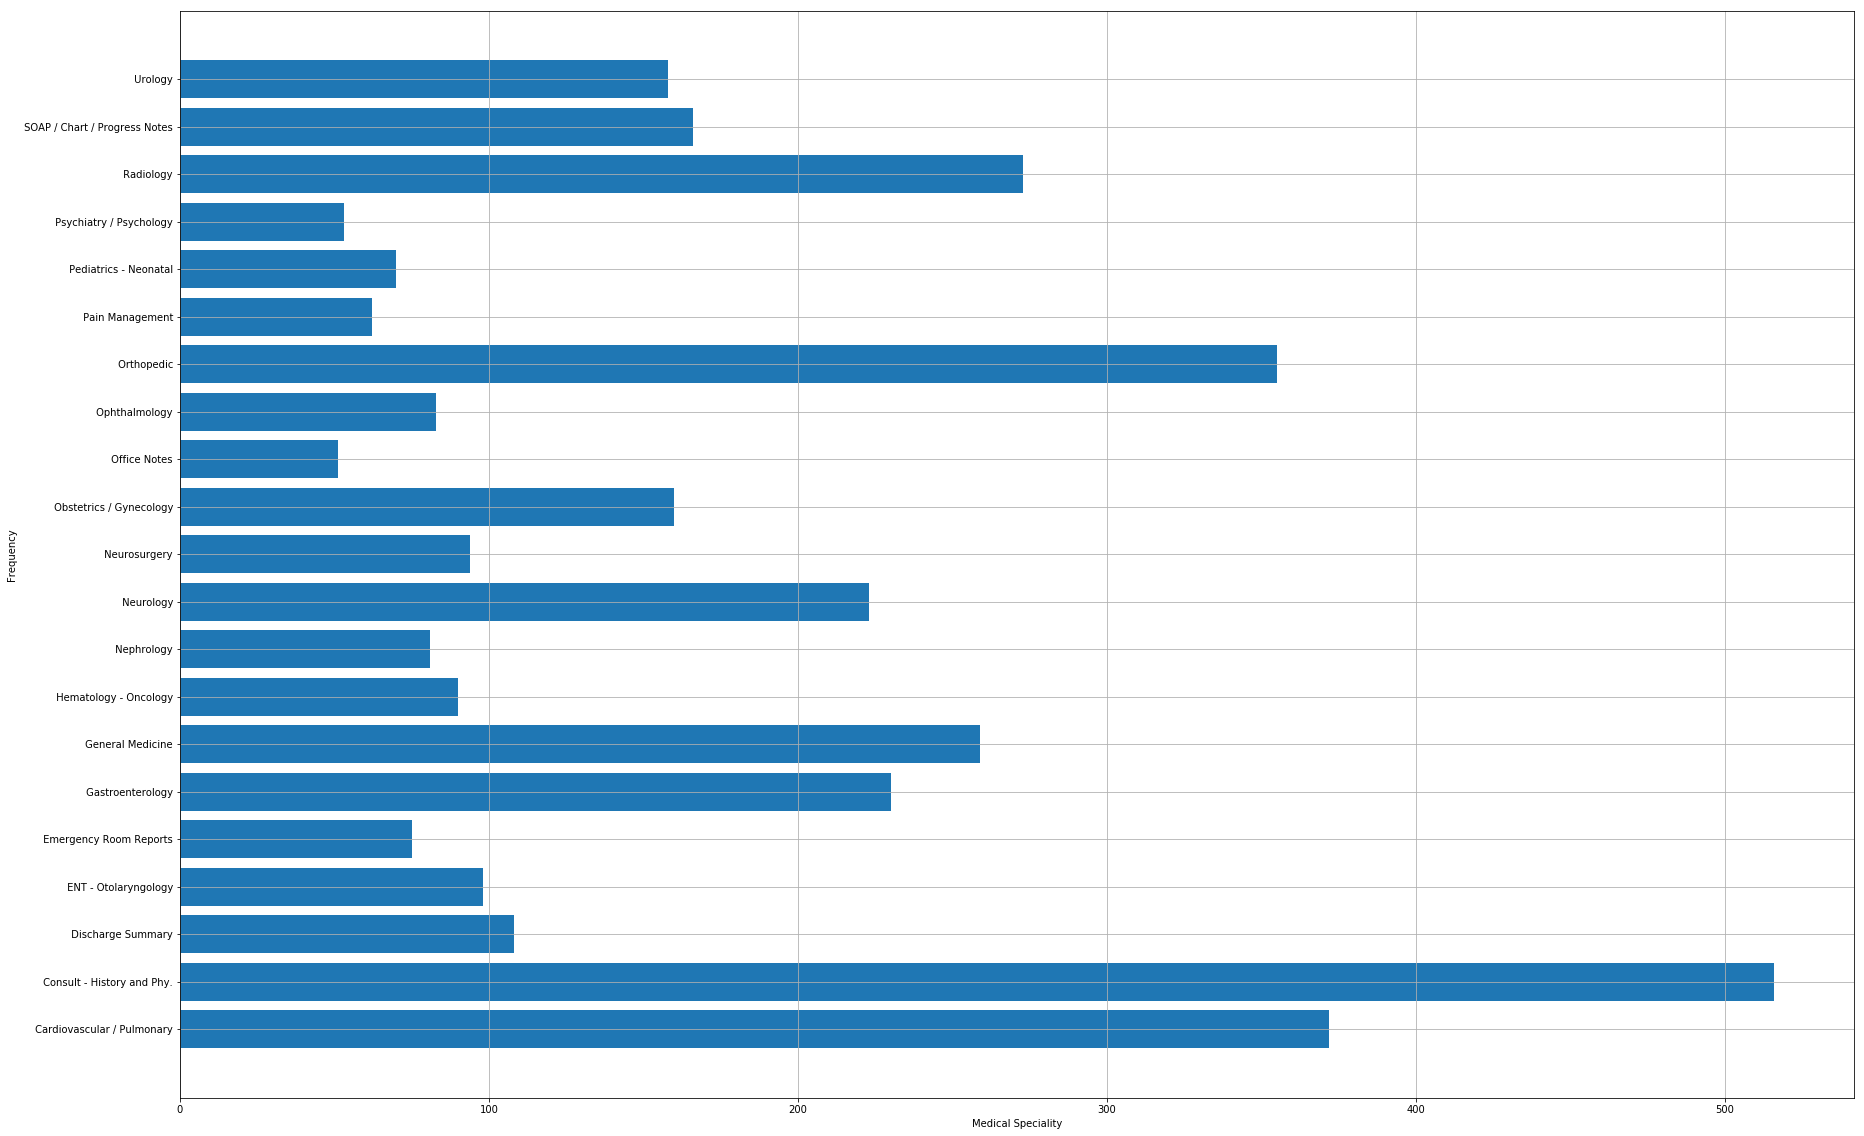

In [10]:
plt.figure(figsize =(30,20))
plt.barh(x.index,x)
plt.xlabel('Medical Speciality')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks()
plt.savefig('after_mts.png')

## Removing the stop words

In [11]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))


In [21]:
tokenizer.num_words

10000

In [12]:
filtered_df.dropna(subset=['transcription'],inplace=True)

In [13]:
filtered_df.transcription = filtered_df.transcription.apply(tokenizer.tokenize)

In [14]:
filtered_df['transcription'] = filtered_df['transcription'].apply(lambda x: " ".join([word.lower() for word in x if word.lower() not in stop_words]))

## Converting text to vectors

In [15]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\d')
tokenizer.fit_on_texts(filtered_df.transcription)

In [16]:
filtered_df['vectors'] = tokenizer.texts_to_sequences(filtered_df.transcription)

### Standardising the vectors to same length

In [17]:
pad_dim = 1000
std_vectors = sequence.pad_sequences(filtered_df.vectors,padding='pre',maxlen=pad_dim)

### Converting labels to binary vectors (required for calculating cros-entropy loss)

In [18]:
encoder1 = LabelBinarizer()
train_labels = encoder1.fit_transform(filtered_df.medical_specialty)
num_classes = encoder1.classes_.shape[0]

## Train_Test Split

In [19]:
X = std_vectors
Y = train_labels

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size = 0.8)

In [20]:
measures = defaultdict(lambda: defaultdict(dict))


## Models Without using NER

### Without Embedding Layer

#### Logistic Regression

##### Model Definition

In [36]:
model = Sequential(layers=[Dense(units=num_classes,activation='softmax',input_shape = (pad_dim,))])

##### Optimiser and loss functions

In [37]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 21)                21021     
Total params: 21,021
Trainable params: 21,021
Non-trainable params: 0
_________________________________________________________________


##### Training

In [41]:
history = model.fit(X_train, y_train,epochs=500,batch_size=32,validation_split=0.2,shuffle=False)

Train on 2277 samples, validate on 570 samples
Epoch 1/500
2277/2277 [==============================] - 0s 163us/step - loss: 14.8550 - acc: 0.0760 - val_loss: 14.1622 - val_acc: 0.1193
Epoch 2/500
2277/2277 [==============================] - 0s 58us/step - loss: 14.0558 - acc: 0.1274 - val_loss: 14.0821 - val_acc: 0.1263
Epoch 3/500
2277/2277 [==============================] - 0s 60us/step - loss: 13.8526 - acc: 0.1397 - val_loss: 13.9322 - val_acc: 0.1351
Epoch 4/500
2277/2277 [==============================] - 0s 54us/step - loss: 13.7713 - acc: 0.1454 - val_loss: 13.9263 - val_acc: 0.1351
Epoch 5/500
2277/2277 [==============================] - 0s 54us/step - loss: 13.7711 - acc: 0.1454 - val_loss: 13.9231 - val_acc: 0.1351
Epoch 6/500
2277/2277 [==============================] - 0s 59us/step - loss: 13.7709 - acc: 0.1454 - val_loss: 13.9221 - val_acc: 0.1351
Epoch 7/500
2277/2277 [==============================] - 0s 61us/step - loss: 13.7707 - acc: 0.1454 - val_loss: 13.9217 - va

In [42]:
measures['Without_NER']['Without_Embed']['LR'] = history.history
model.save('Without_NER_Without_Embed_LR.h5y')

#### Feed Forward Network 

##### Model Definition

In [43]:
FFN_model = Sequential()
FFN_model.add(Dense(units=100,input_shape =(pad_dim,),activation='relu',kernel_regularizer='l2'))
FFN_model.add(Dense(units=100,activation='relu',kernel_regularizer='l2'))
FFN_model.add(Dense(units=num_classes,activation='softmax',kernel_regularizer='l2'))

##### Optimiser and loss functions

In [44]:
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
FFN_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['acc'])
FFN_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               100100    
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 21)                2121      
Total params: 112,321
Trainable params: 112,321
Non-trainable params: 0
_________________________________________________________________


##### Training

In [45]:
FFN_history = FFN_model.fit(X_train, y_train,epochs=500,batch_size=32,validation_split=0.4,shuffle=False)

Train on 1708 samples, validate on 1139 samples
Epoch 1/500
1708/1708 [==============================] - 1s 597us/step - loss: 19.6232 - acc: 0.0217 - val_loss: 20.0274 - val_acc: 0.0176
Epoch 2/500
1708/1708 [==============================] - 0s 130us/step - loss: 19.9363 - acc: 0.0211 - val_loss: 19.9490 - val_acc: 0.0176
Epoch 3/500
1708/1708 [==============================] - 0s 130us/step - loss: 19.8494 - acc: 0.0211 - val_loss: 19.8610 - val_acc: 0.0176
Epoch 4/500
1708/1708 [==============================] - 0s 187us/step - loss: 19.7623 - acc: 0.0211 - val_loss: 19.7748 - val_acc: 0.0176
Epoch 5/500
1708/1708 [==============================] - 0s 218us/step - loss: 19.6771 - acc: 0.0211 - val_loss: 19.6905 - val_acc: 0.0176
Epoch 6/500
1708/1708 [==============================] - 0s 160us/step - loss: 19.5936 - acc: 0.0211 - val_loss: 19.6080 - val_acc: 0.0176
Epoch 7/500
1708/1708 [==============================] - 0s 246us/step - loss: 19.5120 - acc: 0.0211 - val_loss: 19.52

In [46]:
measures['Without_NER']['Without_Embed']['FFN'] = FFN_history.history
FFN_model.save('Without_NER_Without_Embed_FFN.h5y')

712


54

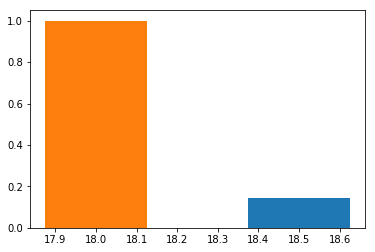

In [47]:
# help(model.layers)
count=0
out={}
# for i in range(1):
#     x = K.variable(np.expand_dims(X_test[i],axis=0))
x = K.variable(X_test)   
y = FFN_model(x)
#     if((K.eval(y)==0).sum() == 10000):
#         count+=1
#         print(count,i)
# count
out = np.argmax(K.eval(y),axis=1)
unique_elements,counts_elements = np.unique(ar=out,return_counts=True)
x= filtered_df.groupby('medical_specialty').apply(lambda x:len(x))
plt.bar(unique_elements+0.5,x/(filtered_df.shape[0]),width=0.25)
plt.bar(unique_elements,counts_elements/out.shape[0],width=0.25)
print(out.shape[0])
(out == np.argmax(y_test,axis=1)).sum()
# x/(x.shape[0])

#### CNN

##### Model Definition

In [48]:
CNN_model = Sequential()
CNN_model.add(Conv1D(filters=100,kernel_size=3,activation='relu',input_shape=(,1),kernel_regularizer='l2'))
CNN_model.add(Conv1D(filters=100,kernel_size=3,activation='relu',kernel_regularizer='l2'))
CNN_model.add(Dropout(0.5))
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Flatten())
CNN_model.add(Dense(units=num_classes,activation='softmax'))

##### Optimiser and loss functions

In [ ]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
CNN_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
CNN_model.summary()


##### Training

In [ ]:
X_train_expd = np.expand_dims(X_train,axis=2)
CNN_history = CNN_model.fit(X_train_expd, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=False)

In [ ]:
measures['Without_NER']['Without_Embed']['CNN'] = CNN_history.history
CNN_model.save('Without_NER_Without_Embed_CNN.h5y')

#### LSTM

##### Model Definition

In [49]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(units=100,input_shape=(pad_dim,1)))
# LSTM_model.add(Flatten())
LSTM_model.add(Dense(units=num_classes,activation='softmax'))

##### Optimiser and loss functions

In [50]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
LSTM_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
LSTM_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_15 (Dense)             (None, 21)                2121      
Total params: 42,921
Trainable params: 42,921
Non-trainable params: 0
_________________________________________________________________


##### Training

In [51]:
X_train_expd = np.expand_dims(X_train,axis=2)
LSTM_history = LSTM_model.fit(X_train_expd, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=False)

Train on 2277 samples, validate on 570 samples
Epoch 1/100
2277/2277 [==============================] - 139s 61ms/step - loss: 2.8799 - acc: 0.1357 - val_loss: 2.8179 - val_acc: 0.1456
Epoch 2/100
1152/2277 [==============>...............] - ETA: 1:15 - loss: 2.7719 - acc: 0.1519

KeyboardInterrupt: 

In [ ]:
measures['Without_NER']['Without_Embed']['LSTM'] = LSTM_history.history
LSTM_model.save('Without_NER_Without_Embed_LSTM.h5y')

### With Embedding Layer 

#### Logistic Regression 

##### Model Definition

In [34]:
model = Sequential()
model.add(Embedding(input_dim=100,output_dim=100,input_length=1000))
model.add(Flatten())
model.add(Dense(units=num_classes,activation='softmax'))

##### Optimiser and loss functions

In [35]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1000, 100)         10000     
_________________________________________________________________
flatten_4 (Flatten)          (None, 100000)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 21)                2100021   
Total params: 2,110,021
Trainable params: 2,110,021
Non-trainable params: 0
_________________________________________________________________


##### Training

In [36]:
history = model.fit(X_train, y_train,epochs=25,batch_size=32,validation_split=0.2,shuffle=False)

Train on 2277 samples, validate on 570 samples
Epoch 1/25


InvalidArgumentError: indices[0,916] = 1625 is not in [0, 100)
	 [[Node: embedding_4/embedding_lookup = GatherV2[Taxis=DT_INT32, Tindices=DT_INT32, Tparams=DT_FLOAT, _class=["loc:@training/RMSprop/Assign_1"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](embedding_4/embeddings/read, embedding_4/Cast, training/RMSprop/gradients/embedding_4/embedding_lookup_grad/concat/axis)]]

In [30]:
measures['Without_NER']['With_Embed']['LR'] = history.history
model.save('Without_NER_With_Embed_LR.h5y')

NameError: name 'history' is not defined

#### Feed Forward Network 

##### Model Definition

In [40]:
FFN_model = Sequential()
FFN_model.add(Embedding(input_dim=1000,output_dim=100,input_shape =(1000,)))
FFN_model.add(Flatten())
FFN_model.add(Dense(units=100,activation='relu'))
FFN_model.add(Dense(units=100,activation='relu'))
FFN_model.add(Dense(units=num_classes,activation='softmax'))

##### Optimiser and loss functions

In [41]:
# sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
FFN_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
FFN_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 1000, 100)         100000    
_________________________________________________________________
flatten_6 (Flatten)          (None, 100000)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10000100  
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 21)                2121      
Total params: 10,112,321
Trainable params: 10,112,321
Non-trainable params: 0
_________________________________________________________________


##### Training

In [42]:
FFN_history = FFN_model.fit(X_train, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=False)

Train on 2277 samples, validate on 570 samples
Epoch 1/100


InvalidArgumentError: indices[0,916] = 1625 is not in [0, 1000)
	 [[Node: embedding_6/embedding_lookup = GatherV2[Taxis=DT_INT32, Tindices=DT_INT32, Tparams=DT_FLOAT, _class=["loc:@training_1/RMSprop/Assign_1"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](embedding_6/embeddings/read, embedding_6/Cast, training_1/RMSprop/gradients/embedding_6/embedding_lookup_grad/concat/axis)]]

In [ ]:
measures['Without_NER']['With_Embed']['FFN'] = FFN_history.history
FFN_model.save('Without_NER_With_Embed_FFN.h5y')

#### CNN

##### Model Definition

In [ ]:
CNN_model = Sequential()
CNN_model.add(Embedding(input_dim=1000,output_dim=100,input_shape =(100,)))
CNN_model.add(Conv1D(filters=100,kernel_size=3,activation='relu',))
CNN_model.add(Conv1D(filters=100,kernel_size=3,activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Flatten())
CNN_model.add(Dense(units=num_classes,activation='softmax'))

##### Optimiser and loss functions

In [ ]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
CNN_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
CNN_model.summary()


##### Training

In [ ]:
X_train_expd = np.expand_dims(X_train,axis=2)
CNN_history = CNN_model.fit(X_train, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=False)

In [ ]:
measures['Without_NER']['With_Embed']['CNN'] = CNN_history.history
CNN_model.save('Without_NER_With_Embed_CNN.h5y')

#### LSTM

##### Model Definition

In [ ]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(input_dim=1000,output_dim=100,input_shape =(100,)))
LSTM_model.add(LSTM(units=100,input_shape=(100,1)))
# LSTM_model.add(Flatten())
LSTM_model.add(Dense(units=num_classes,activation='softmax'))

##### Optimiser and loss functions

In [ ]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
LSTM_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
LSTM_model.summary()


##### Training

In [ ]:
X_train_expd = np.expand_dims(X_train,axis=2)
LSTM_history = LSTM_model.fit(X_train, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=False)

In [ ]:
measures['Without_NER']['With_Embed']['LSTM'] = LSTM_history.history
LSTM_model.save('Without_NER_With_Embed_LSTM.h5y')

### With Embedding Layer and Pre-Trained Glove Weights

#### Loading the Pre-Trained Weights

In [ ]:
import os
glove_dir = '/home/sai/Desktop/Desktop_stuff/Project/Keras/'
# word2vec_dir = '/home/sai/Desktop/Desktop_stuff/Project/Keras/'
embeddings_index = {}
f = open(os.path.join(glove_dir,'glove.6B.100d.txt'))
# f = open(os.path.join(word2vec_dir,'out_1.vec'))
for line in f:
    values = line.split()
    if(len(values)<100):
        continue
    word = values[0]
    coef = np.asarray(values[1:],dtype = 'float32')
    embeddings_index[word] = coef
f.close()
print('Found %s word vectors.' % len(embeddings_index))

In [ ]:
word_index = tokenizer.word_index
tokenizer.word_counts

In [ ]:
embedding_dim = 100
max_words = 1000
count = 0
embedding_matrix = np.zeros((max_words,embedding_dim))
for word,i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
        else:
            count+=1
count            

#### Logistic Regression 

##### Model Definition

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=1000,output_dim=100,input_shape=(100,)))
model.add(Flatten())
model.add(Dense(units=num_classes,activation='softmax'))

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

##### Optimiser and loss functions

In [ ]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()


##### Training

In [ ]:
history = model.fit(X_train, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=False)

In [ ]:
measures['Without_NER']['With_Glove']['LR'] = history.history
model.save('Without_NER_With_Glove_LR.h5y')

In [ ]:
# help(model.layers)
count=0
for i in range(X_train.shape[0]):
    x = K.variable(X_train[i])
    y = model.layers[0](x)
    if((K.eval(y)==0).sum() == 10000):
        count+=1
        print(count,i)
count        

In [ ]:
X_train[0]

#### Feed Forward Network 

##### Model Definition

In [104]:
FFN_model = Sequential()
FFN_model.add(Embedding(input_dim=1000,output_dim=100,input_shape =(100,)))
FFN_model.add(Flatten())
FFN_model.add(Dense(units=100,activation='relu'))
FFN_model.add(Dense(units=100,activation='relu'))
FFN_model.add(Dense(units=num_classes,activation='softmax'))

In [105]:
FFN_model.layers[0].set_weights([embedding_matrix])
FFN_model.layers[0].trainable = False

##### Optimiser and loss functions

In [106]:
sgd = optimizers.SGD(lr=0.01, decay=1e-3, momentum=0.9, nesterov=True)
FFN_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
FFN_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          100000    
_________________________________________________________________
flatten_6 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               1000100   
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 21)                2121      
Total params: 1,112,321
Trainable params: 1,012,321
Non-trainable params: 100,000
_________________________________________________________________


##### Training

In [107]:
FFN_history = FFN_model.fit(X_train, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=True)

Train on 2277 samples, validate on 570 samples
Epoch 1/100
2277/2277 [==============================] - 3s 1ms/step - loss: 2.8540 - acc: 0.1594 - val_loss: 2.7745 - val_acc: 0.1439
Epoch 2/100
2277/2277 [==============================] - 1s 566us/step - loss: 1.9690 - acc: 0.3491 - val_loss: 3.0932 - val_acc: 0.1386
Epoch 3/100
2277/2277 [==============================] - 1s 506us/step - loss: 1.3882 - acc: 0.5613 - val_loss: 3.2736 - val_acc: 0.1474
Epoch 4/100
2277/2277 [==============================] - 1s 405us/step - loss: 1.1864 - acc: 0.6126 - val_loss: 3.5776 - val_acc: 0.1386
Epoch 5/100
2277/2277 [==============================] - 1s 408us/step - loss: 1.0785 - acc: 0.6241 - val_loss: 3.8432 - val_acc: 0.1228
Epoch 6/100
2277/2277 [==============================] - 1s 402us/step - loss: 1.0341 - acc: 0.6491 - val_loss: 3.6220 - val_acc: 0.1211
Epoch 7/100
2277/2277 [==============================] - 1s 422us/step - loss: 0.9890 - acc: 0.6513 - val_loss: 4.2408 - val_acc: 0.1

In [108]:
measures['Without_NER']['With_Glove']['FFN'] = FFN_history.history
FFN_model.save('Without_NER_With_Glove_FFN.h5y')

#### CNN

##### Model Definition

In [109]:
CNN_model = Sequential()
CNN_model.add(Embedding(input_dim=1000,output_dim=100,input_shape =(100,)))
CNN_model.add(Conv1D(filters=100,kernel_size=3,activation='relu',))
CNN_model.add(Conv1D(filters=100,kernel_size=3,activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Flatten())
CNN_model.add(Dense(units=num_classes,activation='softmax'))

In [110]:
CNN_model.layers[0].set_weights([embedding_matrix])
CNN_model.layers[0].trainable = False

##### Optimiser and loss functions

In [111]:
sgd = optimizers.SGD(lr=0.01, decay=1e-3, momentum=0.9, nesterov=True)
CNN_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
CNN_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          100000    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 98, 100)           30100     
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 96, 100)           30100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 96, 100)           0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 48, 100)           0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4800)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 21)                100821    
Total para

##### Training

In [112]:
X_train_expd = np.expand_dims(X_train,axis=2)
CNN_history = CNN_model.fit(X_train, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=False)

Train on 2277 samples, validate on 570 samples
Epoch 1/100
2277/2277 [==============================] - 4s 2ms/step - loss: 2.8130 - acc: 0.1739 - val_loss: 2.6511 - val_acc: 0.2105
Epoch 2/100
2277/2277 [==============================] - 2s 1ms/step - loss: 2.2502 - acc: 0.2868 - val_loss: 2.5543 - val_acc: 0.1719
Epoch 3/100
2277/2277 [==============================] - 2s 1ms/step - loss: 1.7963 - acc: 0.4045 - val_loss: 2.4861 - val_acc: 0.1947
Epoch 4/100
2277/2277 [==============================] - 2s 1ms/step - loss: 1.4929 - acc: 0.4998 - val_loss: 2.6190 - val_acc: 0.1842
Epoch 5/100
2277/2277 [==============================] - 2s 1ms/step - loss: 1.2472 - acc: 0.5714 - val_loss: 2.7463 - val_acc: 0.1719
Epoch 6/100
2277/2277 [==============================] - 2s 984us/step - loss: 1.1149 - acc: 0.6126 - val_loss: 2.9181 - val_acc: 0.1737
Epoch 7/100
2277/2277 [==============================] - 2s 977us/step - loss: 1.0252 - acc: 0.6350 - val_loss: 3.0356 - val_acc: 0.1772
Epoc

In [113]:
measures['Without_NER']['With_Glove']['CNN'] = CNN_history.history
CNN_model.save('Without_NER_With_Glove_CNN.h5y')

#### LSTM

##### Model Definition

In [114]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(input_dim=1000,output_dim=100,input_shape =(100,)))
LSTM_model.add(LSTM(units=100,input_shape=(100,1)))
# LSTM_model.add(Flatten())
LSTM_model.add(Dense(units=num_classes,activation='softmax'))

In [115]:
LSTM_model.layers[0].set_weights([embedding_matrix])
LSTM_model.layers[0].trainable = False

##### Optimiser and loss functions

In [116]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
LSTM_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
LSTM_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          100000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_22 (Dense)             (None, 21)                2121      
Total params: 182,521
Trainable params: 82,521
Non-trainable params: 100,000
_________________________________________________________________


##### Training

In [117]:
X_train_expd = np.expand_dims(X_train,axis=2)
LSTM_history = LSTM_model.fit(X_train, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=False)

Train on 2277 samples, validate on 570 samples
Epoch 1/100
2277/2277 [==============================] - 14s 6ms/step - loss: 2.7969 - acc: 0.1660 - val_loss: 2.7206 - val_acc: 0.1947
Epoch 2/100
2277/2277 [==============================] - 9s 4ms/step - loss: 2.5552 - acc: 0.2266 - val_loss: 2.5739 - val_acc: 0.2263
Epoch 3/100
2277/2277 [==============================] - 9s 4ms/step - loss: 2.4037 - acc: 0.2679 - val_loss: 2.5020 - val_acc: 0.2333
Epoch 4/100
2277/2277 [==============================] - 11s 5ms/step - loss: 2.2767 - acc: 0.3000 - val_loss: 2.4452 - val_acc: 0.2386
Epoch 5/100
2277/2277 [==============================] - 10s 4ms/step - loss: 2.1632 - acc: 0.3303 - val_loss: 2.4476 - val_acc: 0.2667
Epoch 6/100
2277/2277 [==============================] - 11s 5ms/step - loss: 2.0648 - acc: 0.3540 - val_loss: 2.2863 - val_acc: 0.2772
Epoch 7/100
2277/2277 [==============================] - 10s 4ms/step - loss: 1.9863 - acc: 0.3742 - val_loss: 2.2555 - val_acc: 0.2789
Epo

In [118]:
measures['Without_NER']['With_Glove']['LSTM'] = LSTM_history.history
LSTM_model.save('Without_NER_With_Glove_LSTM.h5y')

## Preprocessing Text with ClinicalNER

In [119]:
filtered_df['id'] = filtered_df.index

In [120]:
def file_OUT(row):
    trasncript_dir = os.path.join(os.path.abspath(os.curdir),'Transcript_files/') 
    with open(os.path.join(trasncript_dir,str(row.id)),mode='w') as fp:
        fp.write(str(row.transcription))


In [121]:
trasncript_dir = os.path.join(os.path.abspath(os.curdir),'Transcript_files/') 
_ = filtered_df.apply(file_OUT,axis=1)

In [122]:
def read_extracted(row):
    features = defaultdict(list)
    extracted_dir = os.path.join(os.curdir,'Extracted/',str(row.id)+'.con')
    
    try:
        with open(extracted_dir,mode='r') as fp:
            x = fp.readlines()
        for y in x:
            y = y.split('\"')
            features[y[3]].append(y[1])
    except Exception as e:
            pass
    return features    

In [123]:
filtered_df['Extracted'] = filtered_df.apply(read_extracted,axis=1)


In [124]:
def Extration(row):
    string = ''
#     print(row.id)
    for key in row.Extracted:
        string += key+":"
        string += ", ".join(row.Extracted[key])+"\n"
    return string        

In [125]:
filtered_df['Extraction'] = filtered_df.apply(Extration,axis=1)

In [126]:
Ext_filtered_df = filtered_df[filtered_df.Extraction != '']

## Converting text to vectors

In [127]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=1000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\d')
tokenizer.fit_on_texts(filtered_df.transcription)

In [128]:
Ext_filtered_df['vectors'] = tokenizer.texts_to_sequences(Ext_filtered_df.transcription)

/home/sai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Standardising the vectors to same length

### Converting labels to binary vectors (required for calculating cros-entropy loss)

In [129]:
std_vectors = sequence.pad_sequences(Ext_filtered_df.vectors,padding='pre',maxlen=100)

In [130]:
encoder1 = LabelBinarizer()
train_labels = encoder1.fit_transform(Ext_filtered_df.medical_specialty)
num_classes = encoder1.classes_.shape[0]

## Train_Test Split

In [131]:
X = std_vectors/1000
y = train_labels

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,train_size = 0.8)

/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Models after using NER

### Without Embedding Layer

#### Logistic Regression

##### Model Definition

In [132]:
model = Sequential(layers=[Dense(units=num_classes,activation='softmax',input_shape = (100,))])

#### Optimiser and loss functions

In [133]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 21)                2121      
Total params: 2,121
Trainable params: 2,121
Non-trainable params: 0
_________________________________________________________________


##### Training

In [134]:
history = model.fit(X_train, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=False)

Train on 2262 samples, validate on 566 samples
Epoch 1/100
2262/2262 [==============================] - 2s 752us/step - loss: 2.9281 - acc: 0.1065 - val_loss: 2.8972 - val_acc: 0.1042
Epoch 2/100
2262/2262 [==============================] - 0s 113us/step - loss: 2.8334 - acc: 0.1331 - val_loss: 2.8784 - val_acc: 0.1166
Epoch 3/100
2262/2262 [==============================] - 0s 113us/step - loss: 2.8083 - acc: 0.1375 - val_loss: 2.8758 - val_acc: 0.1201
Epoch 4/100
2262/2262 [==============================] - 0s 115us/step - loss: 2.7917 - acc: 0.1419 - val_loss: 2.8742 - val_acc: 0.1148
Epoch 5/100
2262/2262 [==============================] - 0s 113us/step - loss: 2.7767 - acc: 0.1446 - val_loss: 2.8726 - val_acc: 0.1148
Epoch 6/100
2262/2262 [==============================] - 0s 128us/step - loss: 2.7623 - acc: 0.1525 - val_loss: 2.8709 - val_acc: 0.1148
Epoch 7/100
2262/2262 [==============================] - 0s 98us/step - loss: 2.7484 - acc: 0.1552 - val_loss: 2.8692 - val_acc: 0.

In [135]:
measures['With_NER']['Without_Embed']['LR'] = history.history
model.save('With_NER_Without_Embed_LR.h5y')

#### Feed Forward Network 

##### Model Definition

In [136]:
FFN_model = Sequential()
FFN_model.add(Dense(units=100,input_shape =(100,),activation='relu'))
FFN_model.add(Dense(units=100,activation='relu'))
FFN_model.add(Dense(units=num_classes,activation='softmax'))

##### Optimiser and loss functions

In [137]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
FFN_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
FFN_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_25 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_26 (Dense)             (None, 21)                2121      
Total params: 22,321
Trainable params: 22,321
Non-trainable params: 0
_________________________________________________________________


##### Training

In [138]:
FFN_history = FFN_model.fit(X_train, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=False)

Train on 2262 samples, validate on 566 samples
Epoch 1/100
2262/2262 [==============================] - 2s 851us/step - loss: 2.8571 - acc: 0.1388 - val_loss: 2.8590 - val_acc: 0.1095
Epoch 2/100
2262/2262 [==============================] - 0s 166us/step - loss: 2.7824 - acc: 0.1508 - val_loss: 2.8627 - val_acc: 0.1060
Epoch 3/100
2262/2262 [==============================] - 0s 179us/step - loss: 2.7414 - acc: 0.1636 - val_loss: 2.8702 - val_acc: 0.1078
Epoch 4/100
2262/2262 [==============================] - 0s 181us/step - loss: 2.6990 - acc: 0.1848 - val_loss: 2.8797 - val_acc: 0.1095
Epoch 5/100
2262/2262 [==============================] - 0s 144us/step - loss: 2.6558 - acc: 0.1989 - val_loss: 2.8914 - val_acc: 0.0989
Epoch 6/100
2262/2262 [==============================] - 0s 147us/step - loss: 2.6129 - acc: 0.2135 - val_loss: 2.9083 - val_acc: 0.0972
Epoch 7/100
2262/2262 [==============================] - 0s 153us/step - loss: 2.5694 - acc: 0.2224 - val_loss: 2.9249 - val_acc: 0

In [139]:
measures['With_NER']['Without_Embed']['FFN'] = FFN_history.history
FFN_model.save('With_NER_Without_Embed_FFN.h5y')

#### CNN

##### Model Definition

In [140]:
CNN_model = Sequential()
CNN_model.add(Conv1D(filters=100,kernel_size=3,activation='relu',input_shape=(100,1)))
CNN_model.add(Conv1D(filters=100,kernel_size=3,activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Flatten())
CNN_model.add(Dense(units=num_classes,activation='softmax'))

##### Optimiser and loss functions

In [141]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
CNN_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
CNN_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 98, 100)           400       
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 96, 100)           30100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 96, 100)           0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 48, 100)           0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4800)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 21)                100821    
Total params: 131,321
Trainable params: 131,321
Non-trainable params: 0
_________________________________________________________________


##### Training

In [142]:
X_train_expd = np.expand_dims(X_train,axis=2)
CNN_history = CNN_model.fit(X_train_expd, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=False)

Train on 2262 samples, validate on 566 samples
Epoch 1/100
2262/2262 [==============================] - 4s 2ms/step - loss: 2.8364 - acc: 0.1393 - val_loss: 2.8468 - val_acc: 0.1219
Epoch 2/100
2262/2262 [==============================] - 3s 1ms/step - loss: 2.7816 - acc: 0.1556 - val_loss: 2.8446 - val_acc: 0.1360
Epoch 3/100
2262/2262 [==============================] - 3s 1ms/step - loss: 2.7151 - acc: 0.1768 - val_loss: 2.8452 - val_acc: 0.1166
Epoch 4/100
2262/2262 [==============================] - 2s 1ms/step - loss: 2.6350 - acc: 0.1927 - val_loss: 2.8687 - val_acc: 0.1201
Epoch 5/100
2262/2262 [==============================] - 2s 927us/step - loss: 2.5544 - acc: 0.1914 - val_loss: 2.8956 - val_acc: 0.1113
Epoch 6/100
2262/2262 [==============================] - 3s 1ms/step - loss: 2.4813 - acc: 0.2069 - val_loss: 2.9336 - val_acc: 0.1095
Epoch 7/100
2262/2262 [==============================] - 3s 1ms/step - loss: 2.3974 - acc: 0.2365 - val_loss: 3.0067 - val_acc: 0.1042
Epoch 

In [143]:
measures['With_NER']['Without_Embed']['CNN'] = CNN_history.history
CNN_model.save('With_NER_Without_Embed_CNN.h5y')

#### LSTM

##### Model Definition

In [144]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(units=100,input_shape=(100,1)))
# LSTM_model.add(Flatten())
LSTM_model.add(Dense(units=num_classes,activation='softmax'))

##### Optimiser and loss functions

In [145]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
LSTM_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
LSTM_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_28 (Dense)             (None, 21)                2121      
Total params: 42,921
Trainable params: 42,921
Non-trainable params: 0
_________________________________________________________________


##### Training

In [146]:
X_train_expd = np.expand_dims(X_train,axis=2)
LSTM_history = LSTM_model.fit(X_train_expd, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=False)

Train on 2262 samples, validate on 566 samples
Epoch 1/100
2262/2262 [==============================] - 15s 6ms/step - loss: 2.8462 - acc: 0.1313 - val_loss: 2.8519 - val_acc: 0.0813
Epoch 2/100
2262/2262 [==============================] - 10s 5ms/step - loss: 2.8214 - acc: 0.1370 - val_loss: 2.8449 - val_acc: 0.1148
Epoch 3/100
2262/2262 [==============================] - 12s 5ms/step - loss: 2.8184 - acc: 0.1388 - val_loss: 2.8419 - val_acc: 0.1466
Epoch 4/100
2262/2262 [==============================] - 12s 5ms/step - loss: 2.8163 - acc: 0.1388 - val_loss: 2.8409 - val_acc: 0.1466
Epoch 5/100
2262/2262 [==============================] - 11s 5ms/step - loss: 2.8144 - acc: 0.1410 - val_loss: 2.8410 - val_acc: 0.1466
Epoch 6/100
2262/2262 [==============================] - 9s 4ms/step - loss: 2.8123 - acc: 0.1432 - val_loss: 2.8421 - val_acc: 0.1466
Epoch 7/100
2262/2262 [==============================] - 11s 5ms/step - loss: 2.8095 - acc: 0.1450 - val_loss: 2.8389 - val_acc: 0.1466
Ep

In [147]:
measures['With_NER']['Without_Embed']['LSTM'] = LSTM_history.history
LSTM_model.save('With_NER_Without_Embed_LSTM.h5y')

### With Embedding Layer 

#### Logistic Regression 

##### Model Definition

In [148]:
model = Sequential()
model.add(Embedding(input_dim=1000,output_dim=100,input_shape=(100,)))
model.add(Flatten())
model.add(Dense(units=num_classes,activation='softmax'))

##### Optimiser and loss functions

In [149]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 100)          100000    
_________________________________________________________________
flatten_9 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 21)                210021    
Total params: 310,021
Trainable params: 310,021
Non-trainable params: 0
_________________________________________________________________


##### Training

In [150]:
history = model.fit(X_train, y_train,epochs=10,batch_size=32,validation_split=0.2,shuffle=False)

Train on 2262 samples, validate on 566 samples
Epoch 1/10
2262/2262 [==============================] - 2s 965us/step - loss: 2.8502 - acc: 0.1269 - val_loss: 2.8640 - val_acc: 0.0813
Epoch 2/10
2262/2262 [==============================] - 0s 185us/step - loss: 2.8290 - acc: 0.1357 - val_loss: 2.8608 - val_acc: 0.0813
Epoch 3/10
2262/2262 [==============================] - 0s 184us/step - loss: 2.8253 - acc: 0.1384 - val_loss: 2.8634 - val_acc: 0.1466
Epoch 4/10
2262/2262 [==============================] - 0s 170us/step - loss: 2.8238 - acc: 0.1384 - val_loss: 2.8670 - val_acc: 0.1466
Epoch 5/10
2262/2262 [==============================] - 0s 181us/step - loss: 2.8231 - acc: 0.1384 - val_loss: 2.8604 - val_acc: 0.1466
Epoch 6/10
2262/2262 [==============================] - 0s 195us/step - loss: 2.8209 - acc: 0.1397 - val_loss: 2.8645 - val_acc: 0.1466
Epoch 7/10
2262/2262 [==============================] - 0s 170us/step - loss: 2.8200 - acc: 0.1397 - val_loss: 2.8664 - val_acc: 0.1466
E

In [151]:
measures['With_NER']['With_Embed']['LR'] = history.history
model.save('With_NER_With_Embed_LR.h5y')

#### Feed Forward Network 

##### Model Definition

In [152]:
FFN_model = Sequential()
FFN_model.add(Embedding(input_dim=1000,output_dim=100,input_shape =(100,)))
FFN_model.add(Flatten())
FFN_model.add(Dense(units=100,activation='relu'))
FFN_model.add(Dense(units=100,activation='relu'))
FFN_model.add(Dense(units=num_classes,activation='softmax'))

##### Optimiser and loss functions

In [153]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
FFN_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
FFN_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 100, 100)          100000    
_________________________________________________________________
flatten_10 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 100)               1000100   
_________________________________________________________________
dense_31 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_32 (Dense)             (None, 21)                2121      
Total params: 1,112,321
Trainable params: 1,112,321
Non-trainable params: 0
_________________________________________________________________


##### Training

In [154]:
FFN_history = FFN_model.fit(X_train, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=False)

Train on 2262 samples, validate on 566 samples
Epoch 1/100
2262/2262 [==============================] - 3s 1ms/step - loss: 2.8474 - acc: 0.1286 - val_loss: 2.8922 - val_acc: 0.0813
Epoch 2/100
2262/2262 [==============================] - 1s 438us/step - loss: 2.8293 - acc: 0.1335 - val_loss: 2.8993 - val_acc: 0.0813
Epoch 3/100
2262/2262 [==============================] - 1s 436us/step - loss: 2.8279 - acc: 0.1362 - val_loss: 2.9043 - val_acc: 0.0813
Epoch 4/100
2262/2262 [==============================] - 1s 432us/step - loss: 2.8267 - acc: 0.1379 - val_loss: 2.9051 - val_acc: 0.0813
Epoch 5/100
2262/2262 [==============================] - 1s 438us/step - loss: 2.8267 - acc: 0.1357 - val_loss: 2.8997 - val_acc: 0.0813
Epoch 6/100
2262/2262 [==============================] - 1s 426us/step - loss: 2.8254 - acc: 0.1344 - val_loss: 2.9087 - val_acc: 0.0813
Epoch 7/100
2262/2262 [==============================] - 1s 480us/step - loss: 2.8256 - acc: 0.1388 - val_loss: 2.8957 - val_acc: 0.0

In [155]:
measures['With_NER']['With_Embed']['FFN'] = FFN_history.history
FFN_model.save('With_NER_With_Embed_FFN.h5y')

#### CNN

##### Model Definition

In [156]:
CNN_model = Sequential()
CNN_model.add(Embedding(input_dim=1000,output_dim=100,input_shape =(100,)))
CNN_model.add(Conv1D(filters=100,kernel_size=3,activation='relu',))
CNN_model.add(Conv1D(filters=100,kernel_size=3,activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Flatten())
CNN_model.add(Dense(units=num_classes,activation='softmax'))

##### Optimiser and loss functions

In [157]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
CNN_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
CNN_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 100)          100000    
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 98, 100)           30100     
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 96, 100)           30100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 96, 100)           0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 48, 100)           0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 4800)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 21)                100821    
Total para

##### Training

In [158]:
X_train_expd = np.expand_dims(X_train,axis=2)
CNN_history = CNN_model.fit(X_train, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=False)

Train on 2262 samples, validate on 566 samples
Epoch 1/100
2262/2262 [==============================] - 5s 2ms/step - loss: 12.3717 - acc: 0.0897 - val_loss: 14.1405 - val_acc: 0.1219
Epoch 2/100
2262/2262 [==============================] - 3s 1ms/step - loss: 14.5291 - acc: 0.0986 - val_loss: 14.1405 - val_acc: 0.1219
Epoch 3/100
2262/2262 [==============================] - 4s 2ms/step - loss: 14.5291 - acc: 0.0986 - val_loss: 14.1405 - val_acc: 0.1219
Epoch 4/100
2262/2262 [==============================] - 4s 2ms/step - loss: 14.5291 - acc: 0.0986 - val_loss: 14.1405 - val_acc: 0.1219
Epoch 5/100
2262/2262 [==============================] - 3s 1ms/step - loss: 14.5291 - acc: 0.0986 - val_loss: 14.1532 - val_acc: 0.1219
Epoch 6/100
2262/2262 [==============================] - 3s 1ms/step - loss: 14.5291 - acc: 0.0986 - val_loss: 14.1532 - val_acc: 0.1219
Epoch 7/100
2262/2262 [==============================] - 2s 1ms/step - loss: 14.5291 - acc: 0.0986 - val_loss: 14.1532 - val_acc: 0

In [159]:
measures['With_NER']['With_Embed']['CNN'] = CNN_history.history
CNN_model.save('With_NER_With_Embed_CNN.h5y')

#### LSTM

##### Model Definition

In [160]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(input_dim=1000,output_dim=100,input_shape =(100,)))
LSTM_model.add(LSTM(units=100,input_shape=(100,1)))
# LSTM_model.add(Flatten())
LSTM_model.add(Dense(units=num_classes,activation='softmax'))

##### Optimiser and loss functions

In [161]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
LSTM_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
LSTM_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 100)          100000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_34 (Dense)             (None, 21)                2121      
Total params: 182,521
Trainable params: 182,521
Non-trainable params: 0
_________________________________________________________________


##### Training

In [162]:
X_train_expd = np.expand_dims(X_train,axis=2)
LSTM_history = LSTM_model.fit(X_train, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=False)

Train on 2262 samples, validate on 566 samples
Epoch 1/100
2262/2262 [==============================] - 16s 7ms/step - loss: 2.8417 - acc: 0.1304 - val_loss: 2.8603 - val_acc: 0.0813
Epoch 2/100
2262/2262 [==============================] - 12s 5ms/step - loss: 2.8225 - acc: 0.1370 - val_loss: 2.8503 - val_acc: 0.1219
Epoch 3/100
2262/2262 [==============================] - 14s 6ms/step - loss: 2.8199 - acc: 0.1379 - val_loss: 2.8463 - val_acc: 0.1219
Epoch 4/100
2262/2262 [==============================] - 11s 5ms/step - loss: 2.8183 - acc: 0.1388 - val_loss: 2.8440 - val_acc: 0.0813
Epoch 5/100
2262/2262 [==============================] - 12s 5ms/step - loss: 2.8170 - acc: 0.1393 - val_loss: 2.8429 - val_acc: 0.1466
Epoch 6/100
2262/2262 [==============================] - 13s 6ms/step - loss: 2.8161 - acc: 0.1393 - val_loss: 2.8415 - val_acc: 0.1466
Epoch 7/100
2262/2262 [==============================] - 11s 5ms/step - loss: 2.8154 - acc: 0.1379 - val_loss: 2.8408 - val_acc: 0.1466
E

In [163]:
measures['With_NER']['With_Embed']['LSTM'] = LSTM_history.history
LSTM_model.save('With_NER_With_Embed_LSTM.h5y')

### With Embedding Layer and Pre-Trained Glove Weights

#### Loading the Pre-Trained Weights

#### Logistic Regression 

##### Model Definition

In [164]:
model = Sequential()
model.add(Embedding(input_dim=1000,output_dim=100,input_shape=(100,)))
model.add(Flatten())
model.add(Dense(units=num_classes,activation='softmax'))

In [165]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

##### Optimiser and loss functions

In [166]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 100, 100)          100000    
_________________________________________________________________
flatten_12 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_35 (Dense)             (None, 21)                210021    
Total params: 310,021
Trainable params: 310,021
Non-trainable params: 0
_________________________________________________________________


##### Training

In [167]:
history = model.fit(X_train, y_train,epochs=10,batch_size=32,validation_split=0.2,shuffle=False)

Train on 2262 samples, validate on 566 samples
Epoch 1/10
2262/2262 [==============================] - 2s 1ms/step - loss: 2.8368 - acc: 0.1300 - val_loss: 2.8900 - val_acc: 0.0813
Epoch 2/10
2262/2262 [==============================] - 1s 292us/step - loss: 2.8286 - acc: 0.1366 - val_loss: 2.8774 - val_acc: 0.0813
Epoch 3/10
2262/2262 [==============================] - 1s 236us/step - loss: 2.8266 - acc: 0.1384 - val_loss: 2.8763 - val_acc: 0.1466
Epoch 4/10
2262/2262 [==============================] - 1s 311us/step - loss: 2.8263 - acc: 0.1384 - val_loss: 2.8720 - val_acc: 0.1466
Epoch 5/10
2262/2262 [==============================] - 1s 265us/step - loss: 2.8248 - acc: 0.1393 - val_loss: 2.8752 - val_acc: 0.1466
Epoch 6/10
2262/2262 [==============================] - 1s 241us/step - loss: 2.8250 - acc: 0.1366 - val_loss: 2.8727 - val_acc: 0.1466
Epoch 7/10
2262/2262 [==============================] - 0s 194us/step - loss: 2.8236 - acc: 0.1366 - val_loss: 2.8786 - val_acc: 0.1466
Epo

In [168]:
measures['With_NER']['With_Glove']['LR'] = history.history
model.save('With_NER_With_Glove_LR.h5y')

#### Feed Forward Network 

##### Model Definition

In [169]:
FFN_model = Sequential()
FFN_model.add(Embedding(input_dim=1000,output_dim=100,input_shape =(100,)))
FFN_model.add(Flatten())
FFN_model.add(Dense(units=100,activation='relu'))
FFN_model.add(Dense(units=100,activation='relu'))
FFN_model.add(Dense(units=num_classes,activation='softmax'))

In [170]:
FFN_model.layers[0].set_weights([embedding_matrix])
FFN_model.layers[0].trainable = True

##### Optimiser and loss functions

In [171]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
FFN_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
FFN_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 100, 100)          100000    
_________________________________________________________________
flatten_13 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 100)               1000100   
_________________________________________________________________
dense_37 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_38 (Dense)             (None, 21)                2121      
Total params: 1,112,321
Trainable params: 1,112,321
Non-trainable params: 0
_________________________________________________________________


##### Training

In [172]:
FFN_history = FFN_model.fit(X_train, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=False)

Train on 2262 samples, validate on 566 samples
Epoch 1/100
2262/2262 [==============================] - 3s 1ms/step - loss: 3.0278 - acc: 0.1393 - val_loss: 3.0157 - val_acc: 0.1466
Epoch 2/100
2262/2262 [==============================] - 1s 390us/step - loss: 3.0011 - acc: 0.1419 - val_loss: 2.9925 - val_acc: 0.1466
Epoch 3/100
2262/2262 [==============================] - 1s 385us/step - loss: 2.9772 - acc: 0.1419 - val_loss: 2.9717 - val_acc: 0.1466
Epoch 4/100
2262/2262 [==============================] - 1s 388us/step - loss: 2.9556 - acc: 0.1419 - val_loss: 2.9530 - val_acc: 0.1466
Epoch 5/100
2262/2262 [==============================] - 1s 396us/step - loss: 2.9361 - acc: 0.1419 - val_loss: 2.9363 - val_acc: 0.1466
Epoch 6/100
2262/2262 [==============================] - 1s 386us/step - loss: 2.9187 - acc: 0.1419 - val_loss: 2.9215 - val_acc: 0.1466
Epoch 7/100
2262/2262 [==============================] - 1s 385us/step - loss: 2.9033 - acc: 0.1419 - val_loss: 2.9084 - val_acc: 0.1

In [173]:
measures['With_NER']['With_Glove']['FFN'] = FFN_history.history
FFN_model.save('With_NER_With_Glove_FFN.h5y')

#### CNN

##### Model Definition

In [174]:
CNN_model = Sequential()
CNN_model.add(Embedding(input_dim=1000,output_dim=100,input_shape =(100,)))
CNN_model.add(Conv1D(filters=100,kernel_size=3,activation='relu',))
CNN_model.add(Conv1D(filters=100,kernel_size=3,activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Flatten())
CNN_model.add(Dense(units=num_classes,activation='softmax'))

In [175]:
CNN_model.layers[0].set_weights([embedding_matrix])
CNN_model.layers[0].trainable = True

##### Optimiser and loss functions

In [176]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
CNN_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
CNN_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 100, 100)          100000    
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 98, 100)           30100     
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 96, 100)           30100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 96, 100)           0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 48, 100)           0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 4800)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 21)                100821    
Total para

##### Training

In [177]:
X_train_expd = np.expand_dims(X_train,axis=2)
CNN_history = CNN_model.fit(X_train, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=False)

Train on 2262 samples, validate on 566 samples
Epoch 1/100
2262/2262 [==============================] - 4s 2ms/step - loss: 3.0278 - acc: 0.1393 - val_loss: 3.0157 - val_acc: 0.1466
Epoch 2/100
2262/2262 [==============================] - 2s 939us/step - loss: 3.0011 - acc: 0.1419 - val_loss: 2.9925 - val_acc: 0.1466
Epoch 3/100
2262/2262 [==============================] - 2s 1ms/step - loss: 2.9772 - acc: 0.1419 - val_loss: 2.9717 - val_acc: 0.1466
Epoch 4/100
2262/2262 [==============================] - 3s 1ms/step - loss: 2.9556 - acc: 0.1419 - val_loss: 2.9530 - val_acc: 0.1466
Epoch 5/100
2262/2262 [==============================] - 3s 1ms/step - loss: 2.9361 - acc: 0.1419 - val_loss: 2.9363 - val_acc: 0.1466
Epoch 6/100
2262/2262 [==============================] - 2s 997us/step - loss: 2.9187 - acc: 0.1419 - val_loss: 2.9215 - val_acc: 0.1466
Epoch 7/100
2262/2262 [==============================] - 2s 944us/step - loss: 2.9033 - acc: 0.1419 - val_loss: 2.9084 - val_acc: 0.1466
Ep

In [178]:
measures['With_NER']['With_Glove']['CNN'] = CNN_history.history
CNN_model.save('With_NER_With_Glove_CNN.h5y')

#### LSTM

##### Model Definition

In [179]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(input_dim=1000,output_dim=100,input_shape =(100,)))
LSTM_model.add(LSTM(units=100,input_shape=(100,1)))
# LSTM_model.add(Flatten())
LSTM_model.add(Dense(units=num_classes,activation='softmax'))

In [180]:
LSTM_model.layers[0].set_weights([embedding_matrix])
LSTM_model.layers[0].trainable = True

##### Optimiser and loss functions

In [181]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
LSTM_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc'])
LSTM_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 100, 100)          100000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_40 (Dense)             (None, 21)                2121      
Total params: 182,521
Trainable params: 182,521
Non-trainable params: 0
_________________________________________________________________


##### Training

In [182]:
X_train_expd = np.expand_dims(X_train,axis=2)
LSTM_history = LSTM_model.fit(X_train, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=False)

Train on 2262 samples, validate on 566 samples
Epoch 1/100
2262/2262 [==============================] - 16s 7ms/step - loss: 2.8458 - acc: 0.1375 - val_loss: 2.8520 - val_acc: 0.1466
Epoch 2/100
2262/2262 [==============================] - 12s 5ms/step - loss: 2.8224 - acc: 0.1388 - val_loss: 2.8443 - val_acc: 0.1466
Epoch 3/100
2262/2262 [==============================] - 14s 6ms/step - loss: 2.8200 - acc: 0.1388 - val_loss: 2.8418 - val_acc: 0.1466
Epoch 4/100
2262/2262 [==============================] - 11s 5ms/step - loss: 2.8186 - acc: 0.1401 - val_loss: 2.8403 - val_acc: 0.1466
Epoch 5/100
2262/2262 [==============================] - 11s 5ms/step - loss: 2.8175 - acc: 0.1410 - val_loss: 2.8402 - val_acc: 0.1466
Epoch 6/100
2262/2262 [==============================] - 13s 6ms/step - loss: 2.8166 - acc: 0.1410 - val_loss: 2.8394 - val_acc: 0.1466
Epoch 7/100
2262/2262 [==============================] - 13s 6ms/step - loss: 2.8158 - acc: 0.1424 - val_loss: 2.8392 - val_acc: 0.1466
E

In [183]:
measures['With_NER']['With_Glove']['LSTM'] = LSTM_history.history
LSTM_model.save('With_NER_With_Glove_LSTM.h5y')

Without_NER Without_Embed LR val_acc 2 



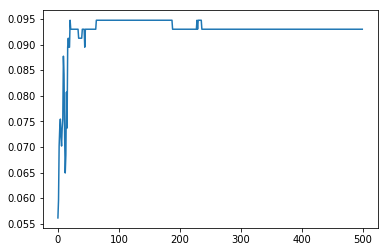

Without_NER Without_Embed FFN val_acc 6 



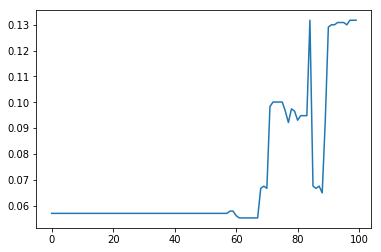

Without_NER Without_Embed CNN val_acc 10 



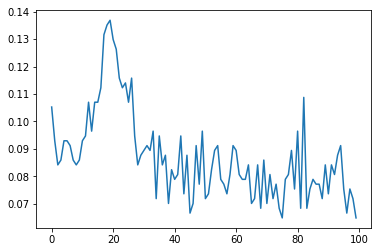

Without_NER Without_Embed LSTM val_acc 14 



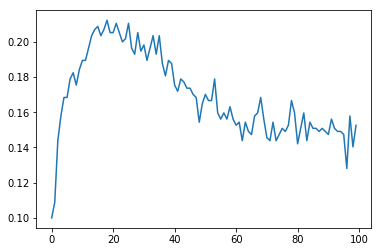

Without_NER With_Embed LR val_acc 18 



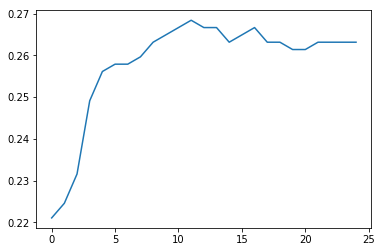

Without_NER With_Embed FFN val_acc 22 



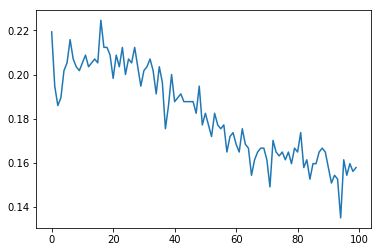

Without_NER With_Embed CNN val_acc 26 



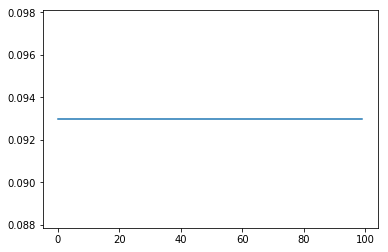

Without_NER With_Embed LSTM val_acc 30 



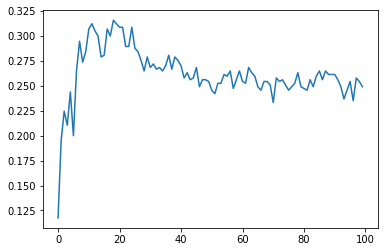

Without_NER With_Glove LR val_acc 34 



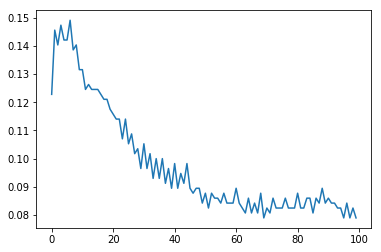

Without_NER With_Glove FFN val_acc 38 



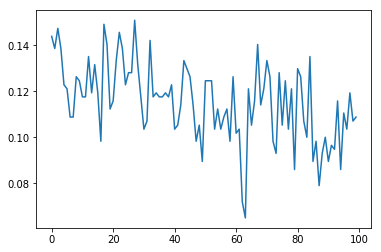

Without_NER With_Glove CNN val_acc 42 



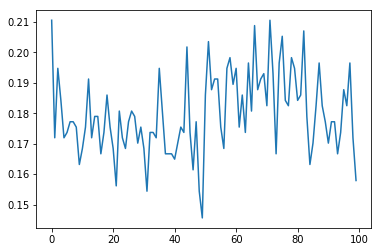

Without_NER With_Glove LSTM val_acc 46 



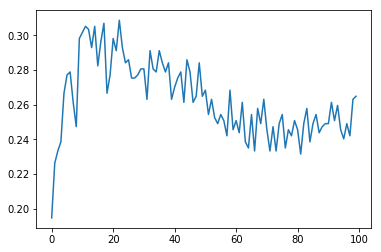

With_NER Without_Embed LR val_acc 50 



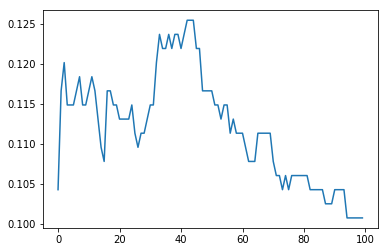

With_NER Without_Embed FFN val_acc 54 



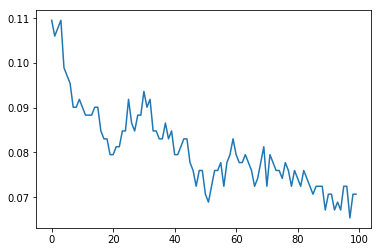

With_NER Without_Embed CNN val_acc 58 



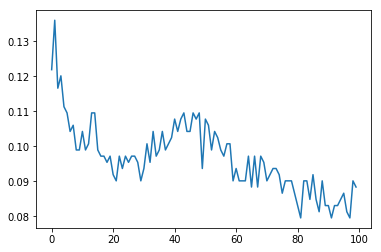

With_NER Without_Embed LSTM val_acc 62 



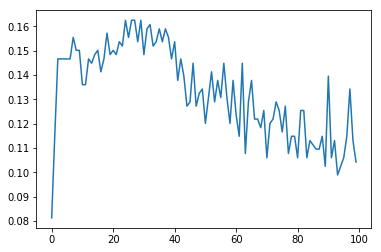

With_NER With_Embed LR val_acc 66 



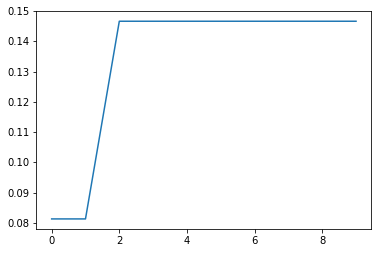

With_NER With_Embed FFN val_acc 70 



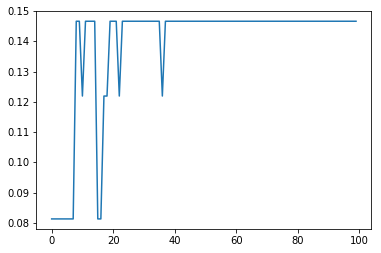

With_NER With_Embed CNN val_acc 74 



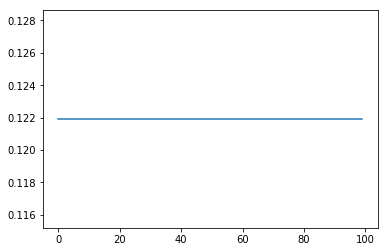

With_NER With_Embed LSTM val_acc 78 



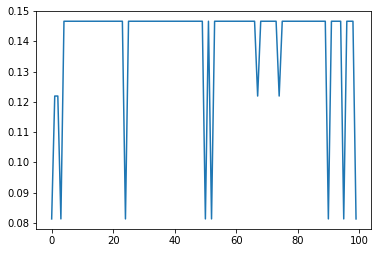

With_NER With_Glove LR val_acc 82 



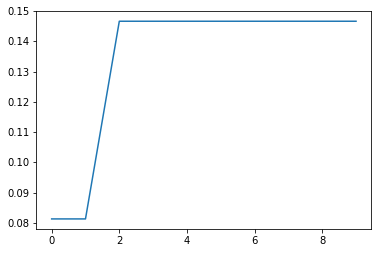

With_NER With_Glove FFN val_acc 86 



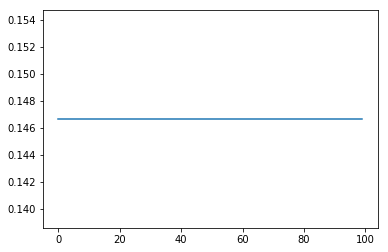

With_NER With_Glove CNN val_acc 90 



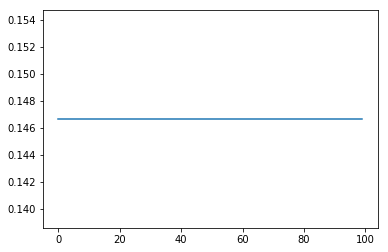

With_NER With_Glove LSTM val_acc 94 



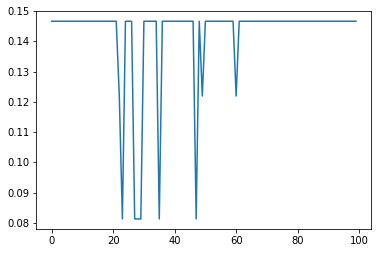

In [198]:
count =0 
for keys,values in measures.items():
    for keys1,values1 in values.items():
        for keys2,values2 in values1.items():
            for keys3,values3 in values2.items():
                    count+=1
                    
                    if(keys3 == 'val_acc' ):
                        print(keys,keys1,keys2,keys3,count,"\n")
                        plt.plot(values3)
                        plt.show()

In [185]:
measures

dict_keys(['Without_NER', 'With_NER'])